# NETFLIX MOVIES AND SHOWS DATA ANALYSIS!!

### Data Description.

- The data is about movies and shows on the Netflix platform. 

  The data has information about  
   -id  
   -title   
   -type     
   -description   
   -release_year  
   -age_certification    
   -runtime   
   -genres    
   -production_countries   
   -seasons  
   -imdb_id  
   -imdb_score  
   -imdb_votes  
   -tmdb_popularity  
   -tmdb_score  


### Question to derive from the dataset.

- 1.Popular Genre
- 2.Popular Production Country
- 3.Year that produced most number of shows.
- 4.Which age_certification bracket has the most movies.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import random
from datetime import datetime
from datetime import timedelta
%matplotlib inline


In [25]:
movie_df=pd.read_csv("C:\\Users\\Mwikali\\OneDrive\\Desktop\\titles.csv")

movie_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


# Data checking

This process is used to clean data check for missing values and duplicate values and drop unncessary columns to make it tidy and ready for EDA.

In [26]:
#stating the columns

movie_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [27]:
#checking the data in the first five rows of the dataframe

movie_df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [28]:
#checking the data in the last five records

movie_df.tail(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0


In [29]:
#checking more detailed information about the data

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [30]:

def repair_array_bound_categories(arr):
    "this function helps to find out programmatically what the current grammar looks like."    
    arr = ast.literal_eval(arr)     
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [31]:
movie_df["production_countries"] = movie_df["production_countries"].apply(repair_array_bound_categories)
movie_df["genres"] = movie_df["genres"].apply(repair_array_bound_categories)

In [32]:
#checking for missing values in each column.

movie_df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                    68
production_countries     232
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

- From the analysis we can see there are missing values in the following columns:

    1.Title    
    2.Description    
    3.Age_certification    
    4.Genres    
    5.Production_countries  
    6.seasons                 
    7.imdb_id                 
    8.imdb_score           
    9.imdb_votes              
    10.tmdb_popularity        
    11tmdb_score    

In [33]:
#check for duplicated values in the data

movie_df.duplicated().any().sum()    


0

 - There are no Duplicated values in the dataset.

# Filling in the missing values.

In [34]:
def obj_fill(col):
    """function to fill missing values within non-numeric columns"""
    col.fillna('N/A',inplace=True)

In [35]:
#filling the NaN str vales.

obj_fill(movie_df['title'])

obj_fill(movie_df['description'])

obj_fill(movie_df['genres'])

obj_fill(movie_df['age_certification'])

In [36]:
# confirming if the NaN str values have been filled

movie_df.isnull().sum()

id                         0
title                      0
type                       0
description                0
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries     232
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [37]:
# fill in missing values for numeric columns

def num_fill(col):
    """function to fill missing values within numeric columns"""
    col.fillna(0,inplace=True)

In [38]:
#calling the above function to fill in the missing numeric values

num_fill(movie_df['production_countries'])

num_fill(movie_df['seasons'])

num_fill(movie_df['imdb_id'])

num_fill(movie_df['imdb_score'])

num_fill(movie_df['imdb_votes'])

num_fill(movie_df['tmdb_popularity'])

num_fill(movie_df['tmdb_score'])

In [39]:
#confirming if the null values have been filled

movie_df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [47]:
#renaming the id column name

movie_df.rename(columns={'id':'Netflix_id'}, inplace=True)

#confirming if the rename has reflected
movie_df.head(3)

,Netflix_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,0,0.0,0.0,0.600,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime,US,0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,0.0,tt0071853,8.2,530877.0,18.216,7.8


In [83]:
#setting the netflix_id as index column

movie_df.set_index('Netflix_id')



,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Netflix_id,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,0.0,0.0,0.600,0.0
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime,US,0.0,8.3,795222.0,27.612,8.2
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,0.0,8.2,530877.0,18.216,7.8
tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,0.0,8.0,392419.0,17.505,7.8
tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,0.0,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,N/A,100,drama,NG,0.0,6.9,39.0,0.966,0.0
tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,N/A,74,documentation,0,0.0,0.0,0.0,1.036,8.5
tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,N/A,88,family,NG,0.0,6.5,32.0,0.709,0.0


In [56]:
# statistical informaation of the dataset.

movie_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,5806.000000,5806.000000,5.806000e+03,5806.000000,5806.000000
mean,2016.013434,77.643989,0.763520,5.944919,2.123419e+04,22.160966,6.444609
std,7.324883,39.474160,1.876199,2.173865,8.326811e+04,68.348626,1.924679
min,1945.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2015.000000,44.000000,0.000000,5.500000,2.850000e+02,3.026250,6.000000
50%,2018.000000,84.000000,0.000000,6.500000,1.705000e+03,7.274500,6.800000
75%,2020.000000,105.000000,1.000000,7.300000,8.216500e+03,17.547500,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


### Saving the Cleaned Dataset



In [59]:
#creating a copy 

clean_df=movie_df.copy()

#saving the data to a jupyter notebook
clean_df.to_csv('Netflix_movies.csv', index=False)

### Analysis of the dataset by the type.

In [61]:
#grouping by movies and shows.

types=clean_df.groupby('type').size().reset_index().rename(columns = {0:'counts'})


types


,type,counts
0,MOVIE,3759
1,SHOW,2047


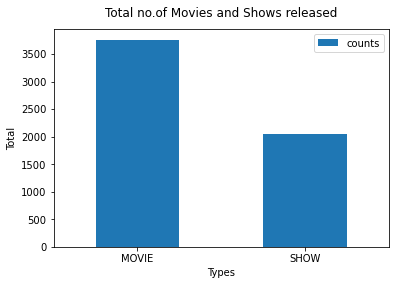

In [63]:
#defining a function for figure size to be used in plotting
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 10}
    
    
    
types.plot(x='type', y='counts', kind='bar')
plt.title('Total no.of Movies and Shows released', y=1.03)
plt.xlabel('Types')
plt.ylabel('Total')

plt.xticks(rotation=0)
plt.show()

#### Observation.
- From the barchart above we can observe that there are more Movies than Shows in netflix, with movies having a total of 3759 and 2047 shows

### Analysis of the Age_certification.

<Figure size 1080x720 with 0 Axes>

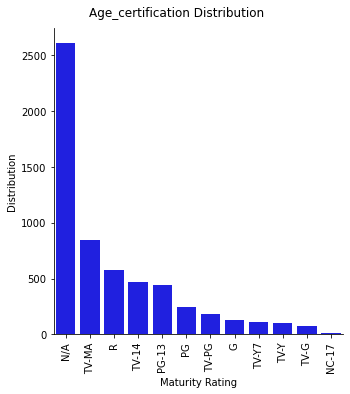

In [67]:
#calling the figure size function
figure_size()

#ordering the bar bins
type_order = clean_df.age_certification.value_counts().sort_values(ascending=False).index

#ploting the frequency plot of age_certfication.
g=sns.catplot(x='age_certification', data=clean_df, kind='count', color='blue', order=type_order)

#setting the title
g.fig.suptitle('Age_certification Distribution',y=1.03)

plt.xlabel('Maturity Rating')
plt.ylabel('Distribution')
plt.xticks(rotation=90)

#plotting the show.
plt.show()

#### Observation.
- We can observe that in Netflix there there are more numbers with unspecified age_certfication or age bracket. 
- However TV_MA has the most number of shows and Movies followed by R and Tv_14.
- NC_17 has the least number of movies and shows in netflix.


### Analysis of the movies by production countries.

In [68]:
Production_countries= clean_df.groupby('production_countries').size().reset_index().sort_values(by=0, ascending=0).reset_index().drop('index', axis=1).rename(columns = {0:'counts'})

Production_countries


,production_countries,counts
0,US,2115
1,IN,614
2,GB,303
3,JP,279
4,0,232
...,...,...
91,MU,1
92,MW,1
93,MZ,1
94,NA,1


In [70]:
#data selection for the first 15 production years
Countries=Production_countries.loc[:15]  

Countries

,production_countries,counts
0,US,2115
1,IN,614
2,GB,303
3,JP,279
4,0,232
5,KR,212
6,ES,180
7,FR,174
8,CA,150
9,MX,107


<Figure size 1080x720 with 0 Axes>

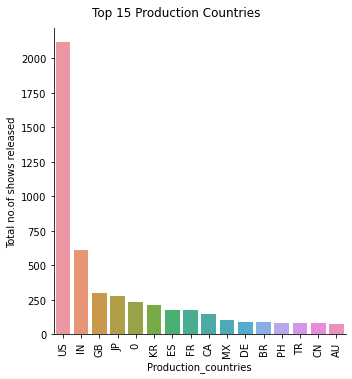

In [71]:
#calling the figure size function.
figure_size()

g=sns.catplot(x='production_countries', y='counts', data=Countries, kind='bar')

g.fig.suptitle('Top 15 Production Countries', y=1.03)

plt.xlabel('Production_countries')
plt.ylabel('Total no.of shows released')


plt.xticks(rotation=90)

plt.show()

#### Observation.
- The observation made from above is that most shows and movies are produced in the United States followed by India and Britain.
- This insight is due to the expanse of the US Hollywood, India's bollywood and UK'S hollywood in the international film industry.

### Analysis of the Genres.

<Figure size 1080x720 with 0 Axes>

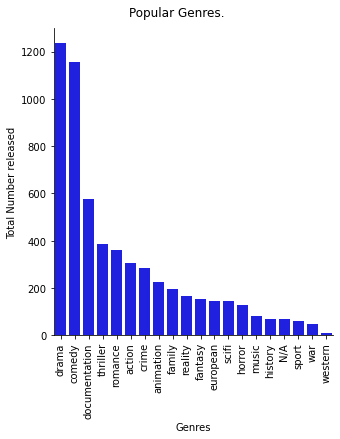

In [77]:
# calling the figure size function.
figure_size()

#ordering the genres bar bins

type_order = clean_df.genres.value_counts().sort_values(ascending=False).index


g=sns.catplot(x='genres', data=clean_df, kind='count', order=type_order, color='blue')

g.fig.suptitle('Popular Genres.',  y=1.03)

plt.xlabel('Genres')
plt.ylabel('Total Number released')

plt.xticks(rotation=90)

plt.show()

#### Observation.
- Most Popular genres in Netflix are Drama, Comedy and documentation.
- While the Least popular genres in netflix is sport, war and western movies.

In [79]:
#categorizing movies according to title, genre and realese year.

years=clean_df.groupby('release_year').size().reset_index().sort_values(by=0, ascending=0).reset_index().drop('index', axis=1).rename(columns = {0:'counts'})

years


,release_year,counts
0,2019,848
1,2020,805
2,2018,774
3,2021,758
4,2017,580
...,...,...
62,1968,1
63,1977,1
64,1978,1
65,1953,1


### Analysis of the production years since 1945-2022

<Figure size 864x720 with 0 Axes>

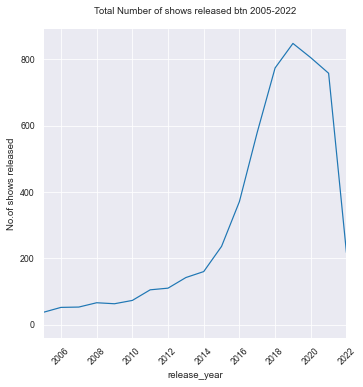

In [82]:

plt.figure(figsize=(12,10))


sns.relplot(x='release_year', y='counts', data=years, kind='line')
sns.set_style('darkgrid')

sns.set_context('paper')
plt.xlabel('release_year')
plt.ylabel('No.of shows released')
plt.xticks(rotation=45)
plt.title('Total Number of shows released btn 2005-2022', y=1.03)

plt.xlim(2005,2022)

plt.show()



#### Observation.
- Most movies in Netflix were released between 2019- 2022.
- 2019 recorded the highest number of released movies.
- There was a reduction in the movies released in 2020 due to the Covid_19 pandemic which restricted close human interactions.

 ### Conclusion

- The following are the conclusions drawn from the analysis.  

  1.There are more movies than shows in Netflix.    
  2.The most popular genres in Netflix are Drama, comedy and documentations movies.  
  3.Most viewers lie in the TV_MA age_certification bracket.  
  4.Most movies are produced in the United states.  
  5.2019 recorded most movies produced in Netflix.  
  6.The Covid_19 pandemic in 2020 affected the Film industry as netfkix recorded a drop in the number of movies and shows recorded in that year.
  

### Limitations

- Netflix recorded a high number of Movies and shows with unspecified age bracket. Hence this makes it difficult to analyze the data correctly in terms of age_certification.

#### Analysis by:

Name: Mercy Mwikali

Signature: M. M